<a href="https://colab.research.google.com/github/nssn96/nssn96.github.io/blob/main/Image_classifier_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training an image classifier**
we will be doing the steps in following order


1.   Load and normalizing the CIFAR10 training and test datasets using torchvision
2.   Define a Convolutional Neural Network
3.   Define a loss function
4.   Train the network on the training data
5.   Test the network on the test data









## **Loading and normalizing CIFAR10**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# **Checking the images from the dataset**

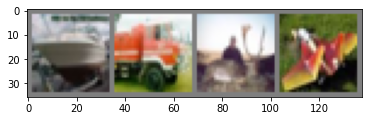

 ship truck  deer plane


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## **Define a Convolutional Neural Network**

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3)
        # self.fc1 = nn.Linear(64 * 2 * 2, 240)
        # self.fc2 = nn.Linear(240, 120)
        # self.fc3 = nn.Linear(120, 84)
        # self.fc4 = nn.Linear(84, 10)
        self.fc1 = nn.Linear(64 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 10)



    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        #x = self.fc4(x)
        return x


net = Net().cuda()

# **Define a Loss function and optimizer**
 we will be using Classification Cross-Entropy loss and SGD with momentum.

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(net.parameters(), lr=0.0003) #----> 71%
# Eff:38% with epoch 5
# optimizer=optim.Adagrad(net.parameters(),lr=0.0003)

# Eff:60% with epoch 5
# optimizer=optim.Rprop(net.parameters(),lr=0.0003)

# Eff:65% with epoch 5
# optimizer=optim.SGD(net.parameters(),lr=0.0009,momentum=0.5)

#Same RMSprop for 2 cov layer and 3 linear layer Eff:49% for 5 epoch
# optimizer=optim.RMSprop(net23.parameters(),lr=0.003)

#optimizer = optim.SGD(net.parameters(), lr=0.008,momentum=0.1)

# **Train the network**

In [6]:
times=10
for epoch in range(times):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

#saving the trained Model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 1.977
[1,  4000] loss: 1.736
[1,  6000] loss: 1.565
[1,  8000] loss: 1.466
[1, 10000] loss: 1.405
[1, 12000] loss: 1.334
[2,  2000] loss: 1.230
[2,  4000] loss: 1.227
[2,  6000] loss: 1.200
[2,  8000] loss: 1.166
[2, 10000] loss: 1.171
[2, 12000] loss: 1.144
[3,  2000] loss: 1.045
[3,  4000] loss: 1.048
[3,  6000] loss: 1.042
[3,  8000] loss: 1.013
[3, 10000] loss: 1.012
[3, 12000] loss: 0.987
[4,  2000] loss: 0.896
[4,  4000] loss: 0.898
[4,  6000] loss: 0.903
[4,  8000] loss: 0.896
[4, 10000] loss: 0.904
[4, 12000] loss: 0.899
[5,  2000] loss: 0.801
[5,  4000] loss: 0.793
[5,  6000] loss: 0.811
[5,  8000] loss: 0.816
[5, 10000] loss: 0.793
[5, 12000] loss: 0.797
[6,  2000] loss: 0.693
[6,  4000] loss: 0.733
[6,  6000] loss: 0.735
[6,  8000] loss: 0.706
[6, 10000] loss: 0.735
[6, 12000] loss: 0.720
[7,  2000] loss: 0.635
[7,  4000] loss: 0.645
[7,  6000] loss: 0.656
[7,  8000] loss: 0.681
[7, 10000] loss: 0.668
[7, 12000] loss: 0.654
[8,  2000] loss: 0.559
[8,  4000] 

# **Test the network on the test data**

We will check this by predicting the class label that the model will give as output and compare against the ground-truth. If the prediction is correct, we add it to the list of correct predictions.



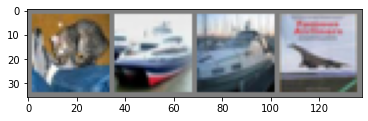

GroundTruth:    cat  ship  ship plane


In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   car  ship plane


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 84 %
Accuracy of  bird : 52 %
Accuracy of   cat : 48 %
Accuracy of  deer : 73 %
Accuracy of   dog : 64 %
Accuracy of  frog : 78 %
Accuracy of horse : 75 %
Accuracy of  ship : 85 %
Accuracy of truck : 79 %


# **Different efficiencies with changes in the epoch,cov layers and optimizers**




In [11]:
#1st Trial) without any changes, the initial model had-----> Accuracy of the network on the 10000 test images: 54 %
#2nd Trial) Same SGD with 3 Cov layer and 4 linear layer and 5 epoch---->Accuracy of the network on the 10000 test images: 66 %
#3rd Trial) Tried with Adam optimizer with Learning rate(lr=0.001) and 5 epoch---> Accuracy of the network on the 10000 test images: 62 %
#will be trying next by increasing the learing rate and the epoch
#4th trial) Tried with Adam optimizer with Learning rate(lr=0.006) and 10 epoch---->Accuracy of the network on the 10000 test images: 10 %
#the accuracy is way to less, will be trying by changing the learning rate and adding momentum
#5th trial) The same Adam optimizer with learning rate (lr=0.0003) and 10 epoch Accuracy of the network on the 10000 test images: 71 %
#6th trial) Changed the optimizer to SGD with -->optimizer = optim.SGD(net.parameters(), lr=0.0003, momentum=0.9), The accuracy was the same 71%
#will be try increasing the number of epoch times
#7th trial) even when increased the epoch times by 10, with 3 Cov layer and 4 linear layer the accuracy was same --->optimizer = optim.SGD(net.parameters(), lr=0.0003, momentum=0.9)
# Next will try experimenting by increasing to 5 liner layers
#8th trial) with the above SGD paramerters and five linear layers the --->Accuracy of the network on the 10000 test images: 68 %, since the accuracy dropped will be trying with 
#Adam optimizer.
#9th trial) when used with Adam optimizer---> Accuracy of the network on the 10000 test images: 70 %
#10th Trial) Now will be trying increasing the epoch time and changing the learning rate,momentum and with SGD.
#optim.SGD(net.parameters(), lr=0.008,momentum=0.1) with 25 epoch----->Accuracy of the network on the 10000 test images: 68 %
#11th trial) Final optimizer used was Adam optimizer ---> optimizer = optim.Adam(net.parameters(), lr=0.0003)--> Accuracy of the network on the 10000 test images: 70 %






















